# Unit 5 - Financial Planning

In [56]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools1 import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [9]:
# Fetch current BTC price
bitcoin_price = requests.get(btc_url).json()["data"]["1"]["quotes"]["CAD"]["price"]

# Fetch current ETH price
ethereum_price = requests.get(eth_url).json()["data"]["1027"]["quotes"]["CAD"]["price"]

# Compute current value of my crpto
my_btc_value = my_btc * bitcoin_price
my_eth_value = my_eth * ethereum_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $43415.49
The current value of your 5.3 ETH is $12578.34


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [12]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [15]:
# Format current date as ISO format
today = pd.Timestamp("2023-06-15", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG,SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio

AGG                                              \
                            open   high      low  close   volume trade_count   
timestamp                                                                      
2023-06-15 04:00:00+00:00  98.29  98.46  98.1337  98.45  7471994       29262   

                                         SPY                                   \
                                vwap    open   high     low  close     volume   
timestamp                                                                       
2023-06-15 04:00:00+00:00  98.355119  436.33  443.9  436.23  442.6  110301302   

                                                   
                          trade_count        vwap  
timestamp                                          
2023-06-15 04:00:00+00:00      748180  440.705812

In [17]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"].iloc[-1]
spy_close_price = df_portfolio["SPY"]["close"].iloc[-1]


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $98.45
Current SPY closing price: $442.6


In [19]:
# Compute the current value of shares
my_agg_value = my_agg * agg_price
my_spy_value = my_spy * spy_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22130.00
The current value of your 200 AGG shares is $19690.00


### Savings Health Analysis

In [54]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
savings_data = [my_btc_value + my_eth_value,my_agg_value + my_spy_value]

columns = ['amount']
index = ['crypto', 'shares']

df_savings = pd.DataFrame(savings_data, columns=columns, index=index)

# Display savings DataFrame
display(df_savings)

,amount
crypto,55993.829749
shares,41820.000000


<Axes: title={'center': 'Composition of Personal Savings'}, ylabel='amount'>

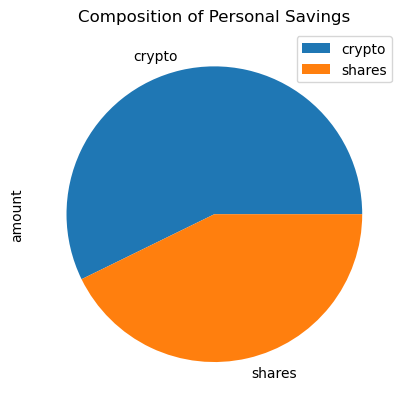

In [55]:
# Plot savings pie chart
df_savings.plot(kind="pie", y="amount",legend=True,title="Composition of Personal Savings")

In [28]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings["amount"].sum()

# Validate saving health
def check_health(total_savings):
    if total_savings > emergency_fund:
        print("Congratulations! You have enough money in your emergency fund.")
    elif total_savings == emergency_fund:
        print("Congratulations! You have reached your financial goal of an emergency fund.")
    else:
        shortfall = emergency_fund - total_savings
        print(f"You are ${shortfall} away from reaching your emergency fund goal.")

check_health(total_savings)

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [31]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-05-15', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-06-15', tz='America/New_York').isoformat()

In [47]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["SPY", "AGG"]
timeframe = "1D"

df_portfolio_5year = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG_5year = df_portfolio_5year[df_portfolio_5year['symbol']=='AGG'].drop('symbol', axis=1)
SPY_5year = df_portfolio_5year[df_portfolio_5year['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG_5year,SPY_5year],axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2018-05-15 04:00:00+00:00  105.49  105.49  105.1900  105.29  2166571   
2018-05-16 04:00:00+00:00  105.36  105.42  105.1500  105.17  2477520   
2018-05-17 04:00:00+00:00  105.19  105.21  105.0000  105.03  2789005   
2018-05-18 04:00:00+00:00  105.16  105.32  105.1600  105.30  2151118   
2018-05-21 04:00:00+00:00  105.28  105.37  105.2405  105.31  1952244   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2018-05-15 04:00:00+00:00        9762  105.340494  271.59  271.61  270.0300   
2018-05-16 04:00:00+00:00        8342  105.233747  271.14  272.76  271.1100   
2018-05-17 04:00:00+00:00        9526  105.081200  271.94  273.23  271.1300   
2018-05-18 04:00:00+00:00        8094  105.270944  271.62  272.03  270.9300   
2018-05-21 04:00:00+00:00        8954  105.319649  273.01  273.98  271.3512   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2018-05-15 04:00:00+00:00  271.03  87156564      303002  270.964245  
2018-05-16 04:00:00+00:00  272.15  53944096      199226  271.944150  
2018-05-17 04:00:00+00:00  272.01  56684400      226826  272.176213  
2018-05-18 04:00:00+00:00  271.34  65633959      201650  271.601239  
2018-05-21 04:00:00+00:00  273.36  58038940      212256  273.095597

In [57]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_simulation = MCSimulation(
    portfolio_data=df_stock_data,
    weights=[0.6, 0.4],
    num_simulation=500,
    num_trading_days=252 * 30
)

In [58]:
# Printing the simulation input data
mc_simulation.portfolio_data.head()

AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2018-05-15 04:00:00+00:00  105.49  105.49  105.1900  105.29  2166571   
2018-05-16 04:00:00+00:00  105.36  105.42  105.1500  105.17  2477520   
2018-05-17 04:00:00+00:00  105.19  105.21  105.0000  105.03  2789005   
2018-05-18 04:00:00+00:00  105.16  105.32  105.1600  105.30  2151118   
2018-05-21 04:00:00+00:00  105.28  105.37  105.2405  105.31  1952244   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-05-15 04:00:00+00:00        9762  105.340494          NaN  271.59   
2018-05-16 04:00:00+00:00        8342  105.233747    -0.001140  271.14   
2018-05-17 04:00:00+00:00        9526  105.081200    -0.001331  271.94   
2018-05-18 04:00:00+00:00        8094  105.270944     0.002571  271.62   
2018-05-21 04:00:00+00:00        8954  105.319649     0.000095  273.01   

                                                                           \
                             high       low   close    volume trade_count   
timestamp                                                                   
2018-05-15 04:00:00+00:00  271.61  270.0300  271.03  87156564      303002   
2018-05-16 04:00:00+00:00  272.76  271.1100  272.15  53944096      199226   
2018-05-17 04:00:00+00:00  273.23  271.1300  272.01  56684400      226826   
2018-05-18 04:00:00+00:00  272.03  270.9300  271.34  65633959      201650   
2018-05-21 04:00:00+00:00  273.98  271.3512  273.36  58038940      212256   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-05-15 04:00:00+00:00  270.964245          NaN  
2018-05-16 04:00:00+00:00  271.944150     0.004132  
2018-05-17 04:00:00+00:00  272.176213    -0.000514  
2018-05-18 04:00:00+00:00  271.601239    -0.002463  
2018-05-21 04:00:00+00:00  273.095597     0.007445

In [59]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001236,1.007699,1.001954,1.002343,0.993008,1.005074,0.991865,0.999716,0.999369,0.999894,...,1.007867,1.000160,1.003215,1.005632,0.989684,0.993842,1.000867,0.994219,0.996940,0.994322
2,1.002447,0.997181,0.994197,1.001213,0.992595,1.008220,0.992696,1.003328,0.996953,1.003749,...,1.004269,0.993242,1.002930,1.006174,0.990230,1.000785,1.001366,0.992193,0.995972,0.984132
3,0.999520,1.000106,0.990840,1.005860,0.993496,0.999024,0.992498,1.005937,0.991191,0.999230,...,1.005681,0.997944,1.002524,0.994951,0.985277,0.996061,1.007961,0.991619,0.990846,0.991500
4,0.999625,1.010149,0.985633,0.999287,0.994833,0.993591,0.995997,1.009579,0.993411,1.001765,...,1.004812,1.005548,1.007754,0.998626,0.979859,0.985584,1.015845,1.001848,0.993751,0.988353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.241909,4.760851,2.510815,3.328918,3.185665,3.487729,3.299205,1.662339,2.644764,1.669590,...,3.226410,1.365614,1.293992,7.469183,1.827668,2.934180,2.810202,4.968363,2.041621,6.931157
7557,1.247342,4.755955,2.522991,3.343503,3.179089,3.476095,3.317234,1.654515,2.636485,1.681630,...,3.251454,1.356173,1.292357,7.479537,1.819191,2.932188,2.792616,5.002616,2.056315,6.915866
7558,1.242621,4.752256,2.512801,3.364868,3.203057,3.473096,3.318553,1.653368,2.634535,1.679456,...,3.256542,1.351647,1.292832,7.501584,1.812822,2.934720,2.814456,4.989157,2.062967,6.880801
7559,1.233729,4.750005,2.507307,3.304263,3.181207,3.434857,3.338852,1.654371,2.633297,1.667365,...,3.223747,1.353988,1.290643,7.556027,1.814002,2.928020,2.810330,5.028571,2.075566,6.850305


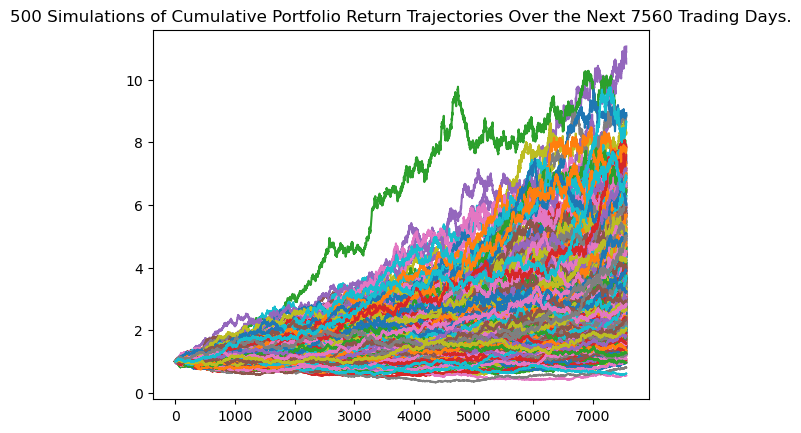

In [60]:
# Plot simulation outcomes
line_plot = mc_simulation.plot_simulation()

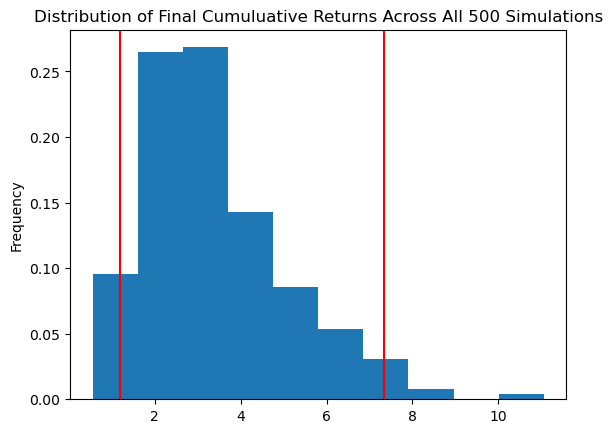

In [61]:
# Plot probability distribution and confidence intervals
dist_plot = mc_simulation.plot_distribution()

### Retirement Analysis

In [62]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl=mc_simulation.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              3.404146
std               1.688363
min               0.552719
25%               2.165799
50%               3.042141
75%               4.238110
max              11.059512
95% CI Lower      1.176203
95% CI Upper      7.330679
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [101]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
def get_ci(initial_investment,tbl,year=30):
    ci_lower = round(tbl[8]*initial_investment,2)
    ci_upper = round(tbl[9]*initial_investment,2)
    # Print results
    print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
          f" over the next {year} years will end within in the range of"
          f" ${ci_lower} and ${ci_upper}")

get_ci(initial_investment,tbl)

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $23524.05 and $146613.57


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [99]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# Print results
get_ci(initial_investment,tbl)

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $35286.08 and $219920.36


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [77]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
mc_simulation_5 = MCSimulation(
    portfolio_data=df_stock_data,
    weights=[0.8, 0.2],
    num_simulation=500,
    num_trading_days=252 * 5
)

In [78]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_simulation_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000639,0.997133,1.005207,0.996929,0.998223,1.001199,0.994282,0.994827,1.001946,1.004639,...,0.998564,0.999941,0.998786,1.002495,0.999798,0.997766,1.002615,0.997609,0.994264,0.997001
2,1.002600,0.996110,1.010841,0.998660,0.995182,1.001520,0.995998,0.998280,1.007953,1.005674,...,0.999816,1.000180,0.993680,1.003395,0.994344,1.000288,1.008474,1.004625,0.998983,0.999845
3,1.004312,0.997843,1.014167,0.996330,0.992332,1.004175,0.994484,0.998328,1.007003,1.004270,...,0.993666,1.002817,0.993851,1.009571,0.999334,1.001650,1.006880,1.004672,0.999587,1.009549
4,1.002250,1.001116,1.015798,1.003444,0.988806,1.009504,0.993626,1.003902,0.998242,1.009015,...,0.993827,1.001855,0.991957,1.012298,1.002494,1.007669,1.007469,1.002903,1.003167,1.003024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.967491,1.177260,1.118611,1.091259,1.297859,1.052362,0.955143,0.878389,1.029602,1.116209,...,0.904545,1.146411,1.163348,1.037983,1.114607,1.080673,1.049560,1.151980,1.062057,1.023374
1257,0.965973,1.178590,1.117881,1.085978,1.300063,1.047558,0.956106,0.872621,1.033043,1.109570,...,0.912024,1.153878,1.166288,1.038554,1.122367,1.074486,1.048493,1.153679,1.057484,1.021917
1258,0.968814,1.185226,1.125554,1.078952,1.305432,1.047387,0.950017,0.873674,1.031897,1.108948,...,0.920112,1.148934,1.163174,1.038021,1.116259,1.073488,1.045233,1.154759,1.058176,1.020246
1259,0.965547,1.185112,1.133041,1.077603,1.304653,1.046231,0.951690,0.872107,1.029301,1.101623,...,0.919661,1.150468,1.167806,1.031059,1.116179,1.075627,1.046326,1.153817,1.055109,1.021382


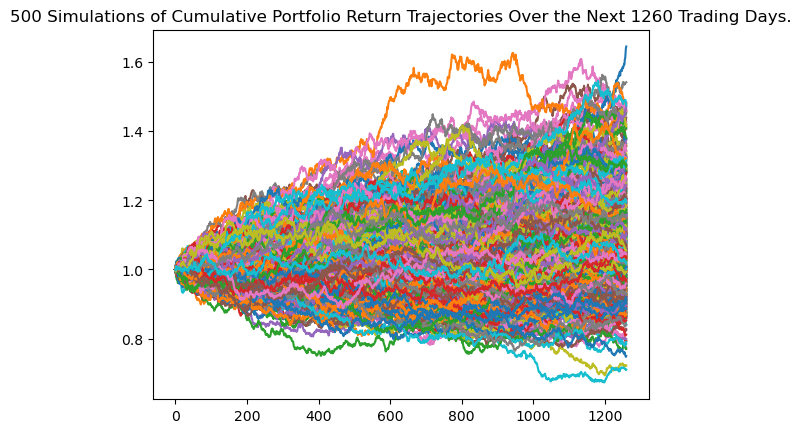

In [79]:
# Plot simulation outcomes
line_plot=mc_simulation_5.plot_simulation()

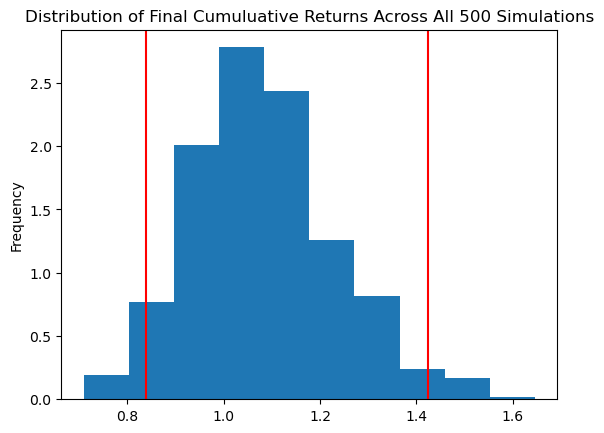

In [80]:
# Plot probability distribution and confidence intervals
dist_plot=mc_simulation_5.plot_distribution()

In [95]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_5=mc_simulation_5.summarize_cumulative_return()

# Print summary statistics
print(tbl_5)

count           500.000000
mean              1.083714
std               0.148509
min               0.710264
25%               0.972687
50%               1.070558
75%               1.170775
max               1.645533
95% CI Lower      0.839685
95% CI Upper      1.424012
Name: 1260, dtype: float64


In [102]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# Print results
get_ci(initial_investment,tbl_5,5)

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $16793.69 and $28480.25


### Ten Years Retirement Option

In [83]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
mc_simulation_10 = MCSimulation(
    portfolio_data=df_stock_data,
    weights=[0.8, 0.2],
    num_simulation=500,
    num_trading_days=252 * 10
)

In [84]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_simulation_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000040,1.006370,1.008246,1.003054,0.999214,0.996543,1.001386,0.997669,1.000794,0.999601,...,1.002020,0.997920,0.995946,1.001180,1.001161,1.005677,1.008391,1.000046,1.005111,0.998827
2,0.999020,1.011706,1.007668,1.004462,1.000110,0.998630,0.992593,0.995479,0.995022,1.001175,...,1.001338,0.996913,0.998054,1.007007,0.998187,1.012540,1.005078,1.000518,1.007058,1.002071
3,1.004485,1.011162,1.017450,1.001138,1.000785,0.998625,0.990391,0.996125,0.986842,1.003544,...,0.993775,0.994185,1.005484,1.006260,0.999524,1.013638,1.009520,0.998198,1.008866,1.000175
4,0.999205,1.009177,1.026525,1.000169,1.006831,1.001186,0.990971,0.991358,0.987667,1.001469,...,0.991402,0.994869,1.006989,1.009941,0.996853,1.015966,1.014105,1.007237,1.015384,0.998361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.372826,1.166987,1.310344,0.779172,1.302902,1.073010,1.451288,0.815760,0.916804,0.952819,...,1.158530,1.005531,1.211741,1.075790,1.106500,1.588559,0.939281,1.089302,0.827326,1.019785
2517,1.372527,1.166168,1.309282,0.778488,1.306937,1.075672,1.456331,0.813514,0.916669,0.952295,...,1.155113,1.003818,1.209477,1.079903,1.106922,1.584031,0.946711,1.084478,0.827912,1.019826
2518,1.377659,1.173503,1.318987,0.782925,1.307928,1.079537,1.445309,0.811195,0.916005,0.953759,...,1.160273,1.011644,1.214001,1.081505,1.112669,1.577694,0.945008,1.087257,0.826861,1.023220
2519,1.384703,1.172691,1.314353,0.782719,1.308860,1.084085,1.443135,0.817101,0.917349,0.951851,...,1.158676,1.009625,1.210106,1.086941,1.115919,1.569145,0.945781,1.088529,0.831572,1.017735


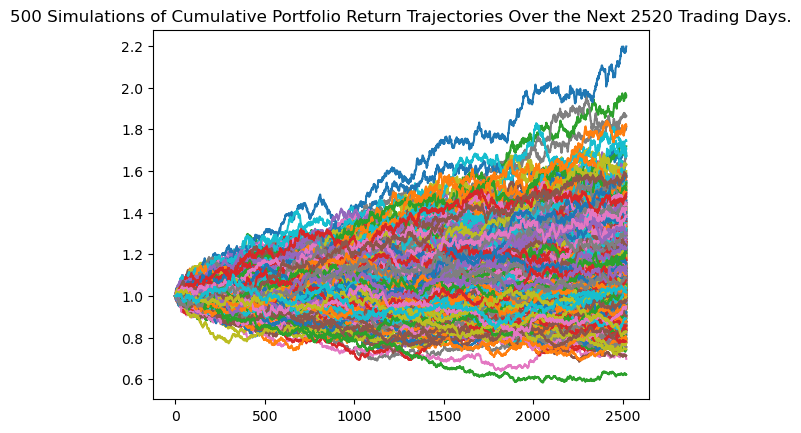

In [87]:
# Plot simulation outcomes
line_plot=mc_simulation_10.plot_simulation()

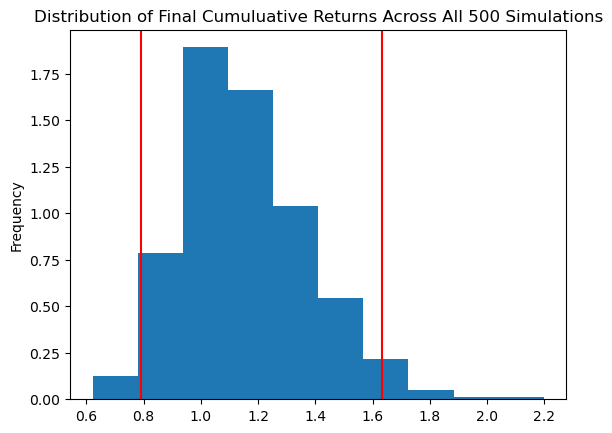

In [90]:
# Plot probability distribution and confidence intervals
dist_plot=mc_simulation_10.plot_distribution()

In [91]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_10=mc_simulation_10.summarize_cumulative_return()

# Print summary statistics
print(tbl_10)

count           500.000000
mean              1.154772
std               0.224067
min               0.622726
25%               0.999529
50%               1.119738
75%               1.298891
max               2.197778
95% CI Lower      0.790560
95% CI Upper      1.631339
Name: 2520, dtype: float64


In [103]:
# Set initial investment
initial_investment=20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
get_ci(initial_investment,tbl_10,10)

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $15811.19 and $32626.78
